[]


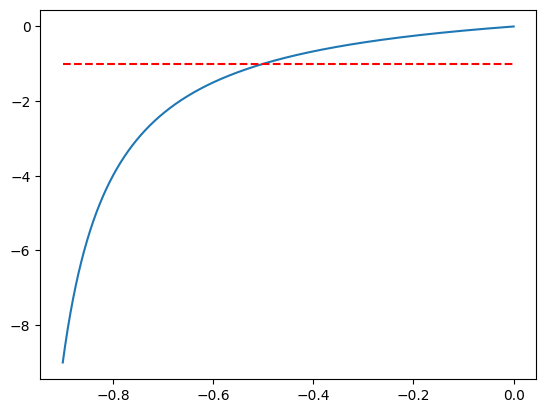

In [27]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-3,-2,1000)
xpos = np.linspace(-0.9, 0, 1000)
def f(a):
    return a/(1+a)
#plt.plot(x, [f(i) for i in x])
plt.plot(xpos,[f(i) for i in xpos])
plt.plot(xpos,(-1)*np.ones(len(xpos)),"r--")
intersect = np.intersect1d(xpos, (-0.1)*np.ones(len(xpos)))
print(intersect)
#plt.plot(intersect[0], intersect[1], "go")

In [30]:
from scipy.optimize import fsolve

def a_gamma(x, g):
    return x**3 + x - g

def eigenvalues_n2(gamma):
    a = fsolve(a_gamma(1), args=(gamma,))
    enum = 4*gamma**2
    denom = a**2 * (1+a**2)**4
    s = np.sqrt(1 - enum/denom)
    return [-2+s, -2-s]

list_gamma = np.linspace(-10,10,10000)
list_eigenvals = [eigenvalues_n2(g) for g in list_gamma]
print(list_eigenvals)

TypeError: a_gamma() missing 1 required positional argument: 'g'